In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

EDA - 1

In [303]:
dataset_1=pd.read_csv('BIKE DETAILS.csv')
dataset_1

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [304]:
# 1. What is the range of selling prices in the dataset?

selling_price_range=dataset_1['selling_price'].max()-dataset_1['selling_price'].min()
print(f"Range of selling prices: {selling_price_range}")

Range of selling prices: 755000


In [305]:
# 2. What is the median selling price for bikes in the dataset?

median_selling_price=dataset_1['selling_price'].median()
print(f"Median selling price for bikes: {median_selling_price}")

Median selling price for bikes: 45000.0


In [306]:
# 3. What is the most common seller type?

most_common_seller_type=dataset_1['seller_type'].mode()[0]
print(f"Most common seller type: {most_common_seller_type}")

Most common seller type: Individual


In [307]:
# 4. How many bikes have driven more than 50,000 kilometers?

bikes_over_50000_km=dataset_1[dataset_1['km_driven']>50000]['name'].count()
print(f"Number of bikes driven more than 50,000 kilometers: {bikes_over_50000_km}")

Number of bikes driven more than 50,000 kilometers: 170


In [308]:
# 5. What is the average km_driven value for each ownership type?

average_km_driven_by_ownership=dataset_1.groupby('owner')['km_driven'].mean()
print("Average km_driven value for each ownership type:")
print(average_km_driven_by_ownership)

Average km_driven value for each ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [309]:
# 6. What proportion of bikes are from the year 2015 or older?

bikes_2015_or_older=dataset_1[dataset_1['year']<=2015]['name'].count()
total_bikes=dataset_1['name'].count()
proportion_bikes_2015_or_older=bikes_2015_or_older/total_bikes
print(f"Proportion of bikes from the year 2015 or older: {proportion_bikes_2015_or_older:.2%}")

Proportion of bikes from the year 2015 or older: 56.64%


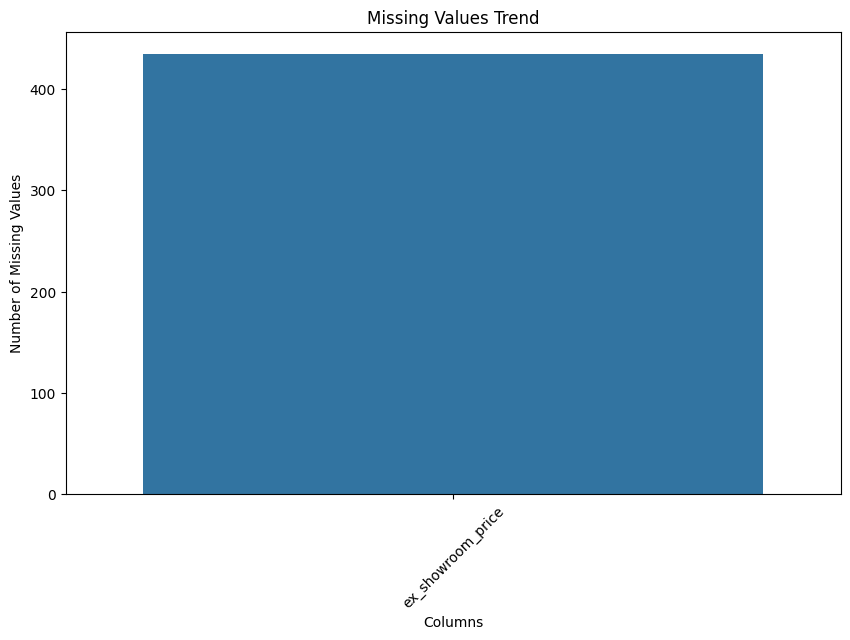

In [310]:
# 7. What is the trend of missing values across the dataset?

missing_values_trend=dataset_1.isnull().sum()
missing_values_trend=missing_values_trend[missing_values_trend>0]
plt.figure(figsize=(10,6))
sns.barplot(x=missing_values_trend.index,y=missing_values_trend.values)
plt.title('Missing Values Trend')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

In [311]:
# 8. What is the highest ex_showroom_price recorded, and for which bike?

highest_ex_showroom_price=dataset_1['ex_showroom_price'].max()
highest_ex_showroom_price_bike=dataset_1[dataset_1['ex_showroom_price']==highest_ex_showroom_price]['name'].values[0]
print(f"Highest ex_showroom_price recorded: {highest_ex_showroom_price} for bike: {highest_ex_showroom_price_bike}")

Highest ex_showroom_price recorded: 1278000.0 for bike: Harley-Davidson Street Bob


In [312]:
# 9. What is the total number of bikes listed by each seller type?

total_bikes_by_seller_type=dataset_1['seller_type'].value_counts()
print("Total number of bikes listed by each seller type:")
print(total_bikes_by_seller_type)

Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


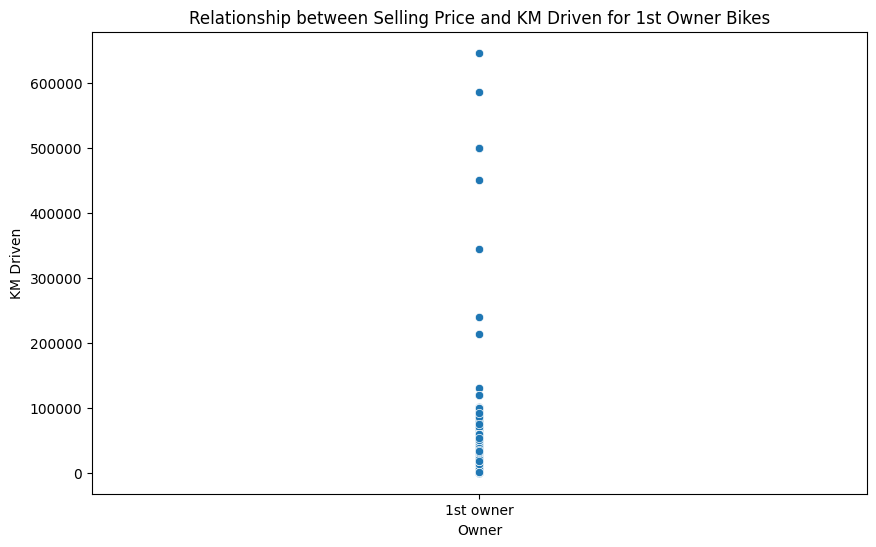

In [313]:
# 10. What is the relationship between selling_price and km_driven for first-owner bikes?

dataset_first_owner=dataset_1[dataset_1['owner']=='1st owner']
plt.figure(figsize=(10,6))
plt.title('Relationship between Selling Price and KM Driven for 1st Owner Bikes')
sns.scatterplot(x=dataset_first_owner['owner'],y=dataset_first_owner['km_driven'])
plt.xlabel('Owner')
plt.ylabel('KM Driven') 
plt.show()

In [314]:
# 11. Identify and remove outliers in the km_driven column using the IQR method.

Q1=dataset_1['km_driven'].quantile(0.25)
Q3=dataset_1['km_driven'].quantile(0.75)
IQR=Q3-Q1
outlier_condition=(dataset_1['km_driven']<(Q1-1.5*IQR))|(dataset_1['km_driven']>(Q3+1.5*IQR))
dataset_no_outliers=dataset_1[~outlier_condition]
print(f"Number of outliers removed: {dataset_1.shape[0]-dataset_no_outliers.shape[0]}")

Number of outliers removed: 39


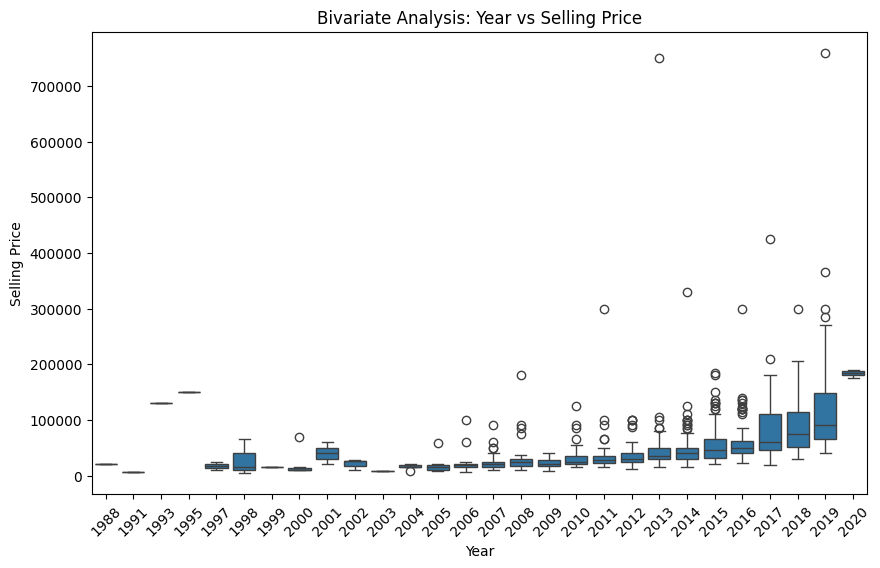

In [315]:
# 12. Perform a bivariate analysis to visualize the relationship between year and selling_price.

plt.figure(figsize=(10,6))
sns.boxplot(x='year',y='selling_price',data=dataset_1)
plt.title('Bivariate Analysis: Year vs Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

Average depreciation in selling price based on bike's age:
    age  selling_price   depreciation
0     5  183333.333333   63643.821705
1     6  119689.511628   32029.137582
2     7   87660.374046    8765.637204
3     8   78894.736842   20425.718151
4     9   58469.018692    1969.018692
5    10   56500.000000    7831.868132
6    11   48668.131868   -2468.854433
7    12   51136.986301   15388.586301
8    13   35748.400000      92.678689
9    14   35655.721311    3862.387978
10   15   31793.333333    9525.476190
11   16   22267.857143  -12021.428571
12   17   34289.285714    9361.699507
13   18   24927.586207    1547.586207
14   19   23380.000000    6401.428571
15   20   16978.571429    1878.571429
16   21   15100.000000    7100.000000
17   22    8000.000000  -12666.666667
18   23   20666.666667  -19333.333333
19   24   40000.000000   19166.666667
20   25   20833.333333    5833.333333
21   26   15000.000000  -13333.333333
22   27   28333.333333   10833.333333
23   28   17500.000000 -13250

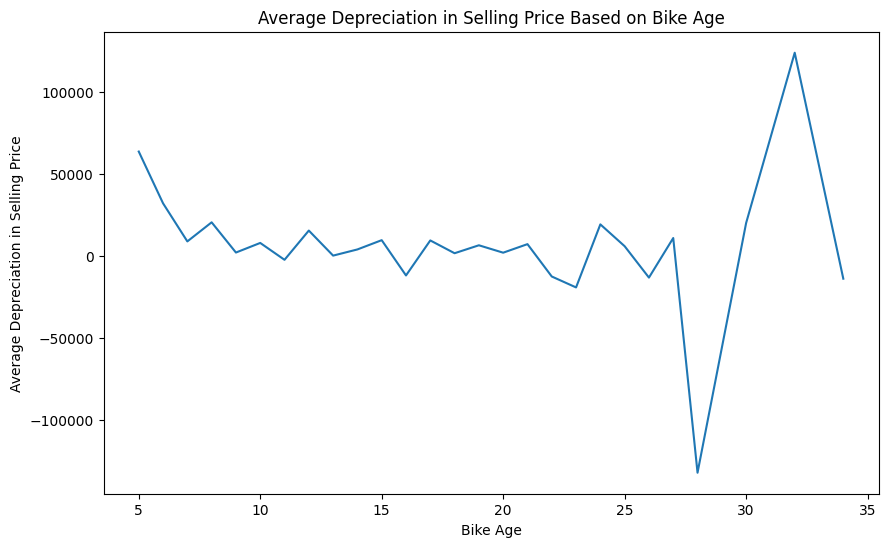

In [316]:
# 13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

current_year=2025
dataset_1['age']=current_year-dataset_1['year']
average_depreciation=dataset_1.groupby('age')['selling_price'].mean().reset_index()
average_depreciation['depreciation']=average_depreciation['selling_price'].diff(-1)
print("Average depreciation in selling price based on bike's age:")
print(average_depreciation)
plt.figure(figsize=(10,6))
plt.title('Average Depreciation in Selling Price Based on Bike Age')
sns.lineplot(x=average_depreciation['age'],y=average_depreciation['depreciation'])
plt.xlabel('Bike Age')
plt.ylabel('Average Depreciation in Selling Price')
plt.show()

In [317]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year?

dataset_1['yearly_average_price']=dataset_1.groupby('year')['selling_price'].transform('mean')
bike_names_above_average=dataset_1[dataset_1['selling_price']>1.2*dataset_1['yearly_average_price']]['name']
print("Bike names priced significantly above the average price for their manufacturing year:")
print(bike_names_above_average)

Bike names priced significantly above the average price for their manufacturing year:
0                  Royal Enfield Classic 350
2        Royal Enfield Classic Gunmetal Grey
7       Royal Enfield Bullet 350 [2007-2011]
13                             Yamaha YZF R3
17                          Yamaha YZF R15 S
                        ...                 
984                Royal Enfield Classic 500
985                Royal Enfield Classic 500
1005                      TVS Apache RTR 160
1008                      Bajaj Pulsar 220 F
1023                  Bajaj Avenger 220 dtsi
Name: name, Length: 233, dtype: object


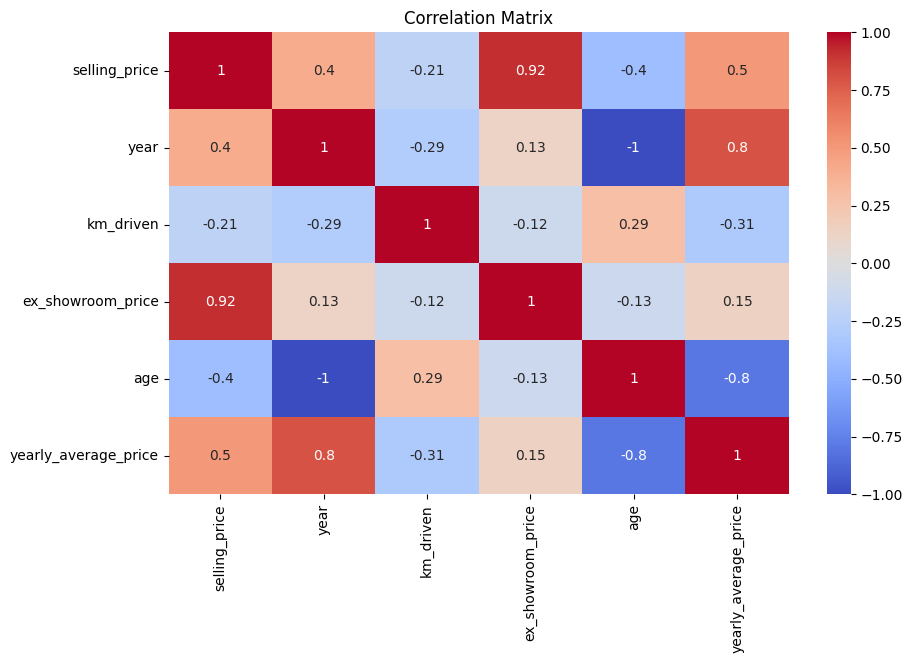

In [318]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.

correlation_matrix=dataset_1.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

EDA - 2

In [319]:
dataset_2=pd.read_csv('Car Sale.csv')
dataset_2['Engine']=dataset_2['Engine'].str.replace('Â\xa0',' ')
dataset_2

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,Double Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,Double Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


Average selling price of cars for each dealer:
Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                           

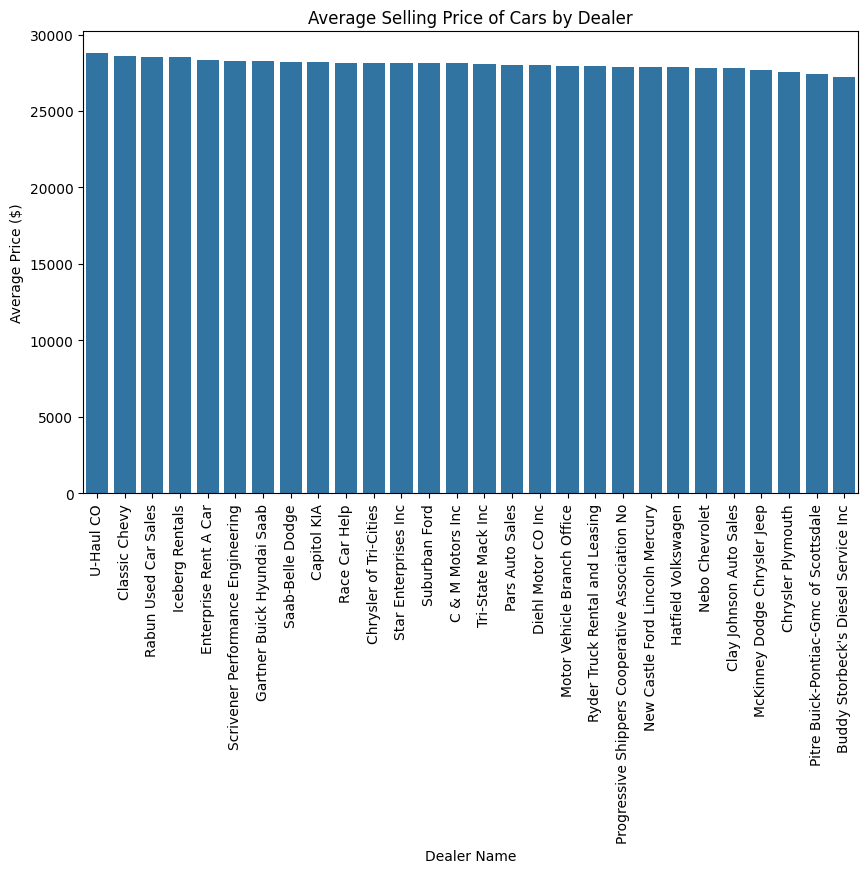

In [320]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

average_selling_price_by_dealer=dataset_2.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False) 
print("Average selling price of cars for each dealer:")
print(average_selling_price_by_dealer)
plt.figure(figsize=(10,6))
sns.barplot(x=average_selling_price_by_dealer.index,y=average_selling_price_by_dealer.values)
plt.title('Average Selling Price of Cars by Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.show()

Car brand with the highest variation in prices:
Company
Lincoln    19658.050211
Name: Price ($), dtype: float64


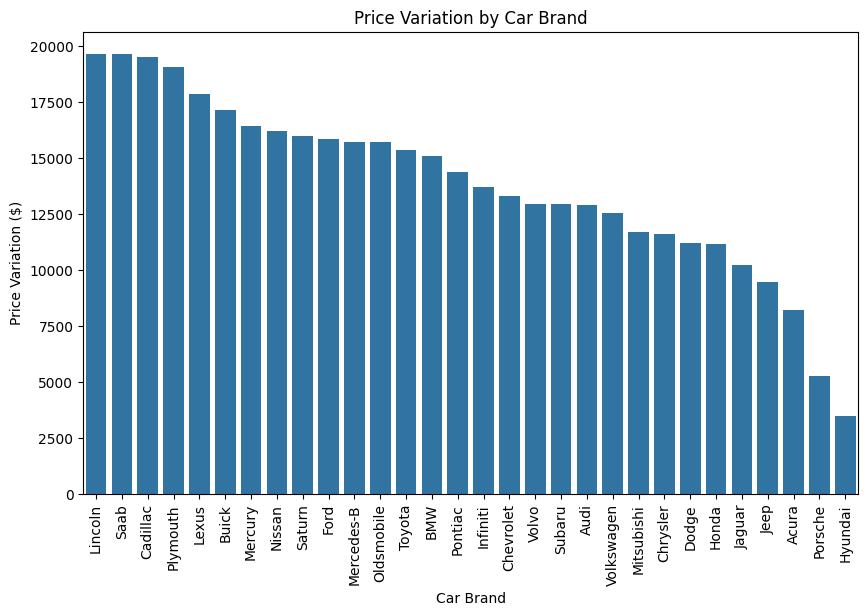

In [321]:
# 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

price_variation_by_brand=dataset_2.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print("Car brand with the highest variation in prices:")
print(price_variation_by_brand.head(1))
plt.figure(figsize=(10,6))
sns.barplot(x=price_variation_by_brand.index,y=price_variation_by_brand.values)
plt.title('Price Variation by Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Price Variation ($)')
plt.xticks(rotation=90)
plt.show()

#Summary:
#The car brand with the highest variation in prices indicates that this brand offers a wide range 
#of models across different price segments — from budget-friendly to luxury options. 
#This diversity in the product lineup leads to a larger spread in prices compared to other brands.
#In contrast, brands with lower price variation typically focus on a narrower market segment, 
#offering cars with more consistent pricing.

Distribution of car prices for each transmission type:
                count          mean           std     min      25%      50%  \
Transmission                                                                  
Auto          12571.0  28248.525972  13747.070597  1200.0  19000.0  24000.0   
Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   

                  75%      max  
Transmission                    
Auto          35500.0  75700.0  
Manual        34000.0  85800.0  
Interquartile range for each transmission type:
Transmission
Auto      16500.0
Manual    17000.0
dtype: float64


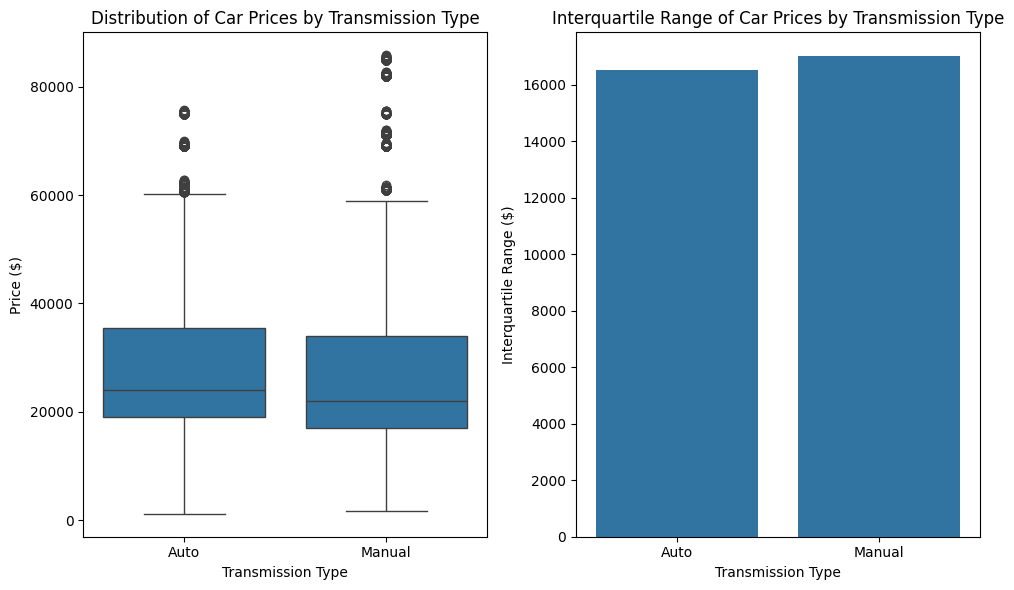

In [322]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

transmission_price_distribution=dataset_2.groupby('Transmission')['Price ($)'].describe()
print("Distribution of car prices for each transmission type:")
print(transmission_price_distribution)   
iqr=transmission_price_distribution['75%']-transmission_price_distribution['25%']
print("Interquartile range for each transmission type:")
print(iqr)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(x='Transmission',y='Price ($)',data=dataset_2)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)') 
plt.subplot(1,2,2)
sns.barplot(x=iqr.index,y=iqr.values)
plt.title('Interquartile Range of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Interquartile Range ($)')
plt.tight_layout()
plt.show()

Distribution of car prices across different regions:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0

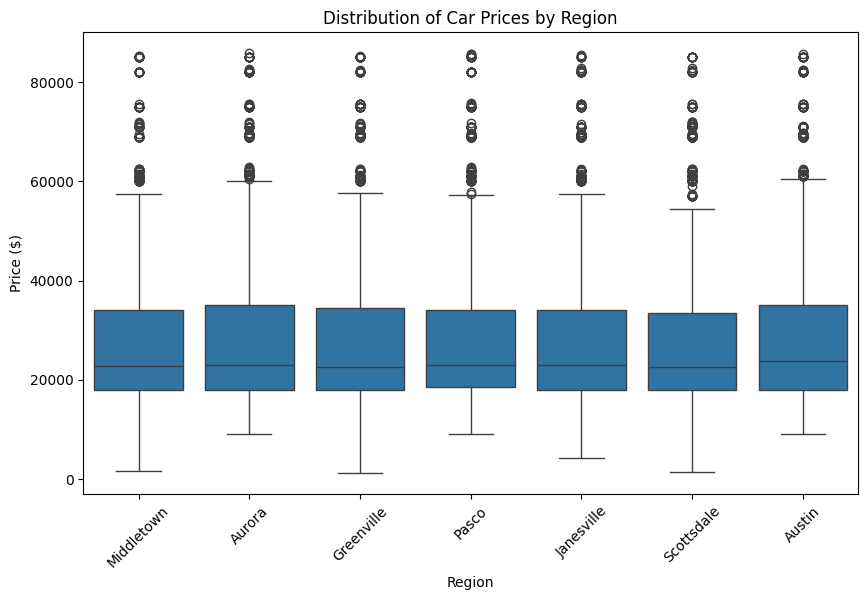

In [323]:
# 4. What is the distribution of car prices across different regions?

region_price_distribution=dataset_2.groupby('Dealer_Region')['Price ($)'].describe()
print("Distribution of car prices across different regions:")
print(region_price_distribution)
plt.figure(figsize=(10,6))
sns.boxplot(x='Dealer_Region',y='Price ($)',data=dataset_2)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

Distribution of cars based on body styles:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


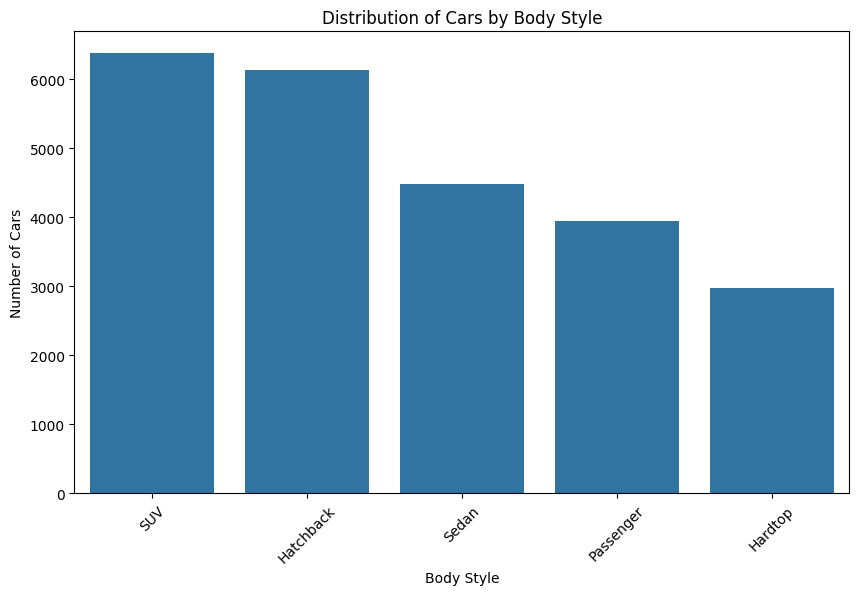

In [324]:
# 5. What is the distribution of cars based on body styles?

body_style_distribution=dataset_2['Body Style'].value_counts()
print("Distribution of cars based on body styles:")
print(body_style_distribution)
plt.figure(figsize=(10,6))
sns.barplot(x=body_style_distribution.index,y=body_style_distribution.values)
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

Average selling price of cars by customer gender and annual income:
      Gender  Annual Income     Price ($)
0     Female          13500  28132.038732
1     Female         106000  46001.000000
2     Female         121000  20000.000000
3     Female         190000  19001.000000
4     Female         211000  51000.000000
...      ...            ...           ...
3437    Male        6600000  39000.000000
3438    Male        6800000  15000.000000
3439    Male        7650000  21000.000000
3440    Male        8000000  85000.000000
3441    Male       11200000  26001.000000

[3442 rows x 3 columns]


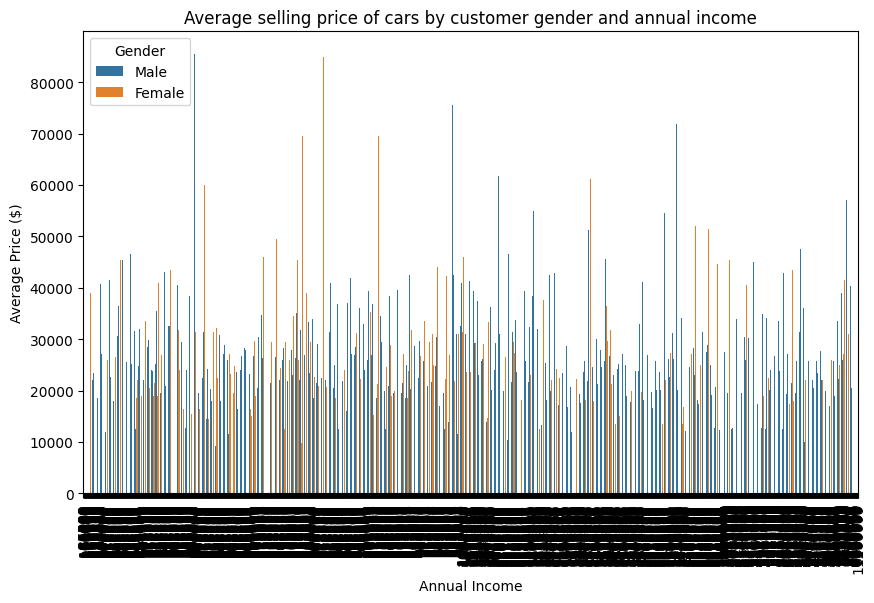

In [325]:
# 6. How does the average selling price of cars vary by customer gender and annual income?

average_selling_price=dataset_2.groupby(['Gender','Annual Income'])['Price ($)'].mean().reset_index()
print("Average selling price of cars by customer gender and annual income:")
print(average_selling_price)
plt.figure(figsize=(10,6))
sns.barplot(x='Annual Income',y='Price ($)',hue='Gender',data=average_selling_price)
plt.title('Average selling price of cars by customer gender and annual income')
plt.xlabel('Annual Income')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.show()

Distribution of car prices by region and number of cars sold:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0

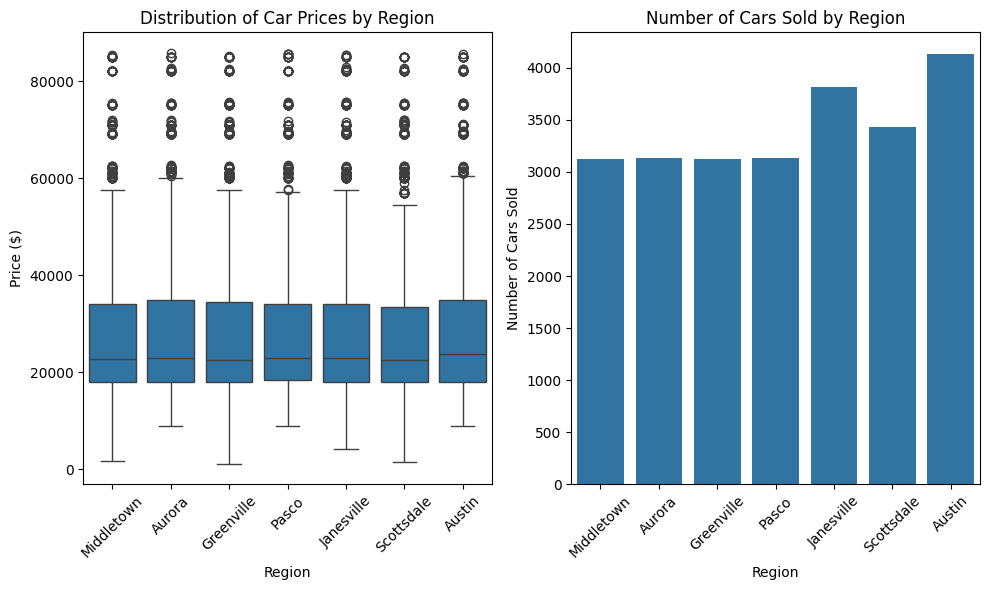

In [326]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

region_price_distribution_and_car_sold=dataset_2.groupby('Dealer_Region')['Price ($)'].describe()
print("Distribution of car prices by region and number of cars sold:")
print(region_price_distribution_and_car_sold)
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(x='Dealer_Region',y='Price ($)',data=dataset_2)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.countplot(x='Dealer_Region',data=dataset_2)
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average car price by engine size:
                     Engine     Price ($)
0  Double Overhead Camshaft  28248.525972
1         Overhead Camshaft  27914.710631


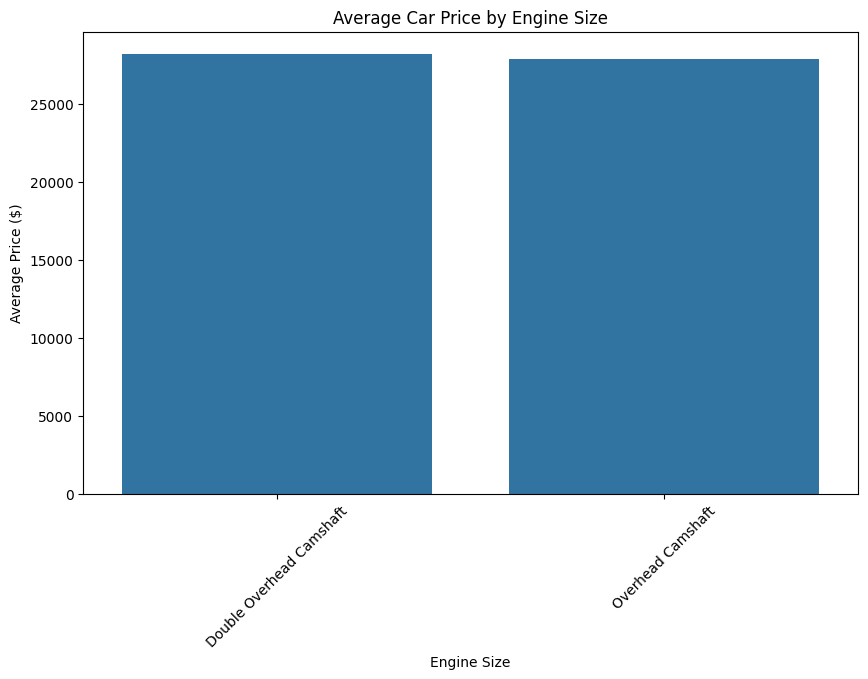

In [327]:
# 8. How does the average car price differ between cars with different engine sizes?

average_price_by_engine_size=dataset_2.groupby('Engine')['Price ($)'].mean().reset_index()
print("Average car price by engine size:")
print(average_price_by_engine_size)
plt.figure(figsize=(10,6))
sns.barplot(x='Engine',y='Price ($)',data=average_price_by_engine_size)
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

Average car price by income bracket:
  Income Bracket     Price ($)
0            Low  27884.297820
1   Lower-Middle           NaN
2         Middle  43000.000000
3   Upper-Middle  46001.000000
4           High  28146.802995


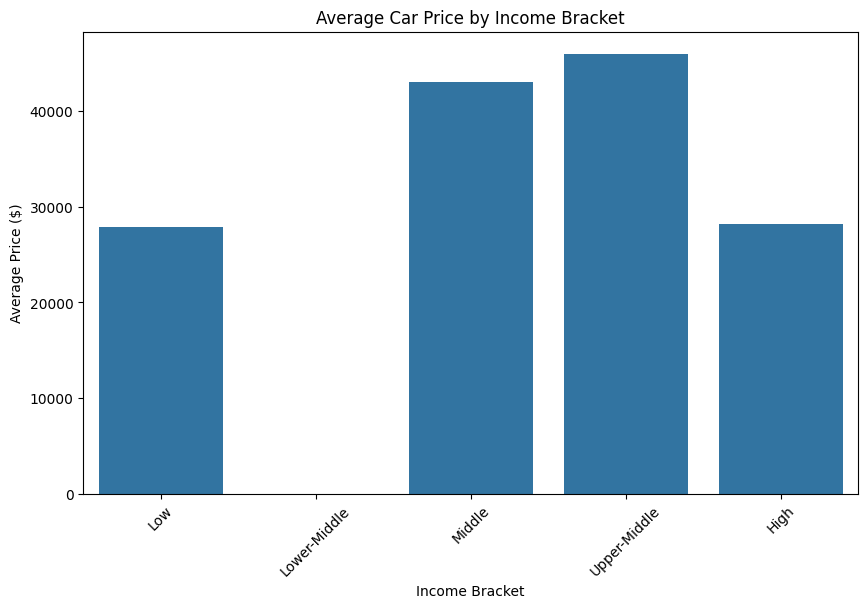

In [328]:
# 9. How do car prices vary based on the customer’s annual income bracket?

dataset_2['Income Bracket']=pd.cut(dataset_2['Annual Income'],bins=[0,30000,60000,90000,120000,np.inf],labels=['Low','Lower-Middle','Middle','Upper-Middle','High'])
average_price_by_income_bracket=dataset_2.groupby('Income Bracket')['Price ($)'].mean().reset_index()
print("Average car price by income bracket:")
print(average_price_by_income_bracket)
plt.figure(figsize=(10,6))
sns.barplot(x='Income Bracket',y='Price ($)',data=average_price_by_income_bracket)
plt.title('Average Car Price by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()

Top 5 car models with the highest number of sales:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


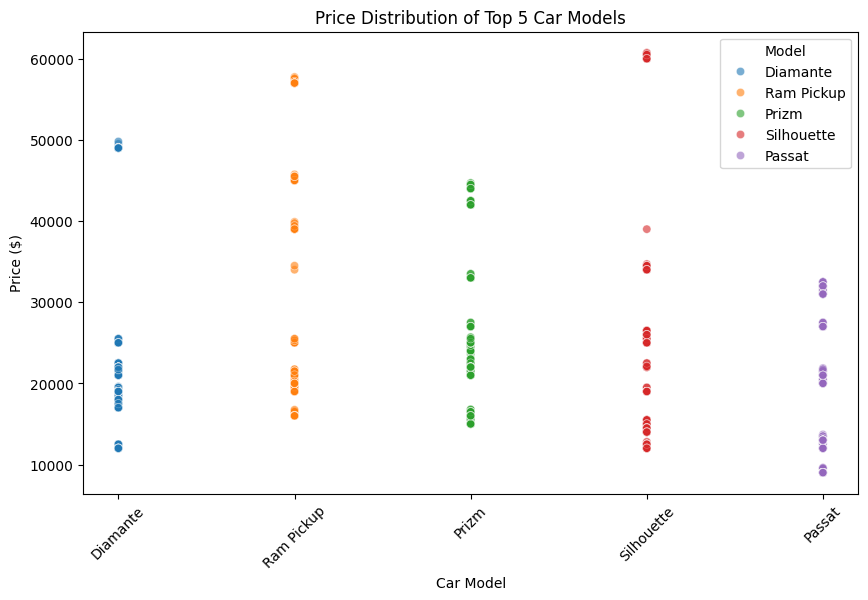

In [329]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

top_5_models=dataset_2['Model'].value_counts().head(5)
top_5_models_data=dataset_2[dataset_2['Model'].isin(top_5_models.index)]
print("Top 5 car models with the highest number of sales:")
print(top_5_models)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Model',y='Price ($)',data=top_5_models_data,hue='Model',alpha=0.6)
plt.title('Price Distribution of Top 5 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

Car price variation with engine size across different colors:
                     Engine       Color     Price ($)
0  Double Overhead Camshaft       Black  12418.674126
1  Double Overhead Camshaft  Pale White  14402.413401
2  Double Overhead Camshaft         Red  13499.354247
3         Overhead Camshaft       Black  17457.405345
4         Overhead Camshaft  Pale White  13000.103061
5         Overhead Camshaft         Red  17346.642554
Colors with the highest price variation:
                     Engine       Color     Price ($)
3         Overhead Camshaft       Black  17457.405345
5         Overhead Camshaft         Red  17346.642554
1  Double Overhead Camshaft  Pale White  14402.413401
2  Double Overhead Camshaft         Red  13499.354247
4         Overhead Camshaft  Pale White  13000.103061


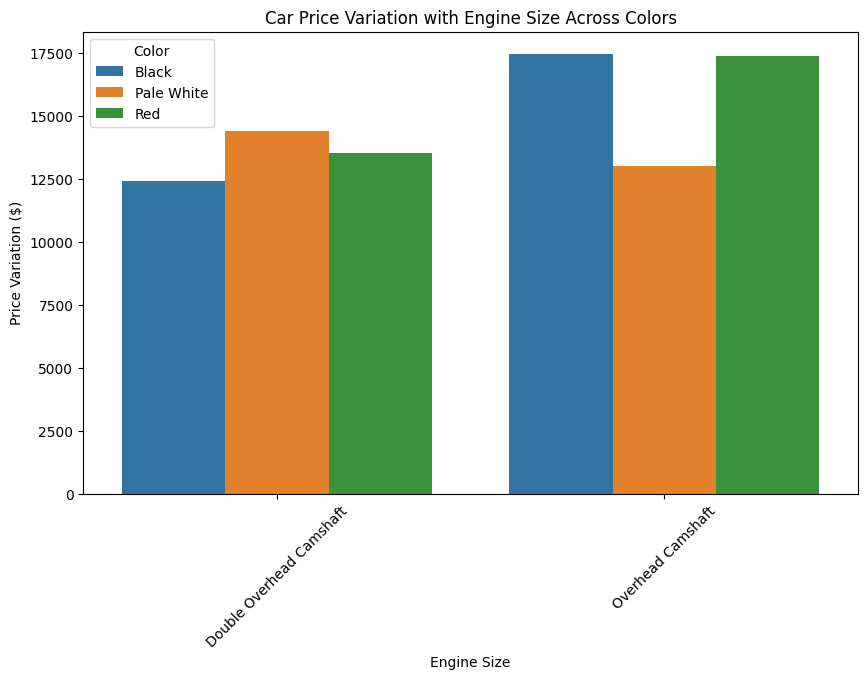

In [330]:
# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

engine_size_color_price_variation=dataset_2.groupby(['Engine','Color'])['Price ($)'].std().reset_index()
print("Car price variation with engine size across different colors:")
print(engine_size_color_price_variation)
highest_variation_colors=engine_size_color_price_variation.sort_values(by='Price ($)',ascending=False).head(5)
print("Colors with the highest price variation:")
print(highest_variation_colors)
plt.figure(figsize=(10,6))
sns.barplot(x='Engine',y='Price ($)',hue='Color',data=engine_size_color_price_variation)
plt.title('Car Price Variation with Engine Size Across Colors')
plt.xlabel('Engine Size')
plt.ylabel('Price Variation ($)')
plt.xticks(rotation=45)
plt.legend(title='Color')
plt.show()

Monthly car sales:
    Month  Customer Name
0       1            790
1       2            735
2       3           1535
3       4           1655
4       5           1895
5       6           1715
6       7           1725
7       8           1705
8       9           3305
9      10           1830
10     11           3469
11     12           3546


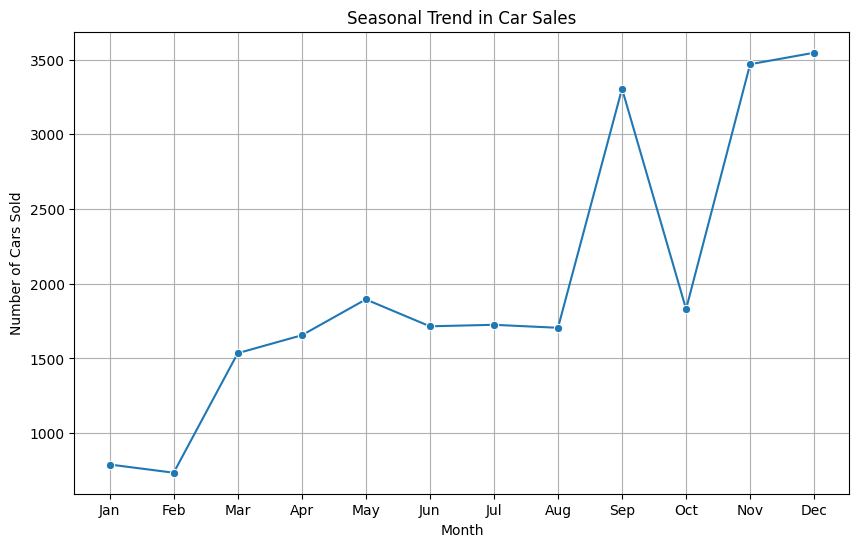

In [331]:
# 12. Is there any seasonal trend in car sales based on the date of sale?

dataset_2['Date']=pd.to_datetime(dataset_2['Date'])
dataset_2['Month']=dataset_2['Date'].dt.month
monthly_sales=dataset_2.groupby('Month')['Customer Name'].count().reset_index()
print("Monthly car sales:")
print(monthly_sales)
plt.figure(figsize=(10,6))
sns.lineplot(x='Month',y='Customer Name',data=monthly_sales,marker='o')
plt.title('Seasonal Trend in Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(ticks=np.arange(1,13),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid()
plt.show()

Car price distribution by body style and transmission type:
  Body Style Transmission   count          mean           std      min  \
0    Hardtop         Auto  1408.0  31520.188210  13687.756740  12000.0   
1    Hardtop       Manual  1563.0  27016.943698  14072.501848  11000.0   
2  Hatchback         Auto  3458.0  25910.544824  13144.014337   4200.0   
3  Hatchback       Manual  2670.0  28702.550562  16284.049616   1700.0   
4  Passenger         Auto  2020.0  28915.835149  13946.481932   9000.0   
5  Passenger       Manual  1925.0  28969.521039  18523.684163  10000.0   
6        SUV         Auto  3086.0  27501.404407  13299.927913   1200.0   
7        SUV       Manual  3288.0  26079.019161  14621.526541   2200.0   
8      Sedan         Auto  2599.0  29955.294344  14310.910860  12000.0   
9      Sedan       Manual  1889.0  29664.271572  15440.056434  11000.0   

       25%      50%      75%      max  
0  21001.0  27000.0  43125.0  75501.0  
1  17575.5  22001.0  29000.0  82500.0  
2  18

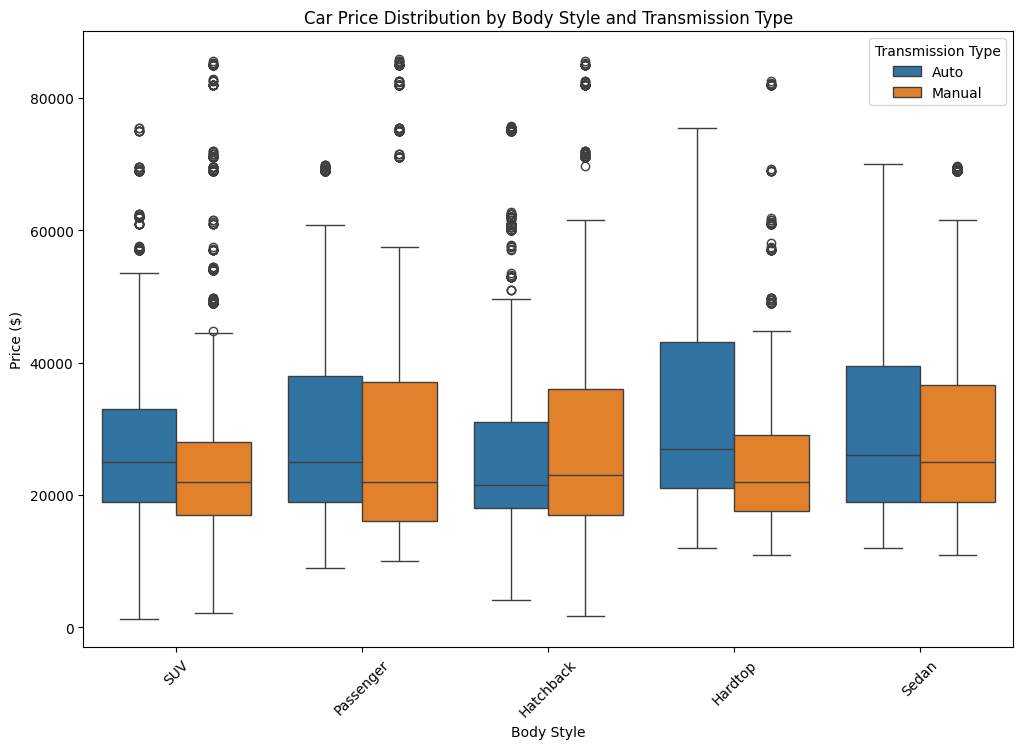

In [332]:
# 13. How does the car price distribution change when considering different combinations of body style and transmission type?

body_style_transmission_price=dataset_2.groupby(['Body Style','Transmission'])['Price ($)'].describe().reset_index()
print("Car price distribution by body style and transmission type:")
print(body_style_transmission_price)
plt.figure(figsize=(12,8))
sns.boxplot(x='Body Style',y='Price ($)',hue='Transmission',data=dataset_2)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Transmission Type')
plt.show()

Correlation matrix between car price, engine size, and annual income:
               Price ($)  Engine Size  Annual Income
Price ($)       1.000000    -0.011271       0.012065
Engine Size    -0.011271     1.000000      -0.006598
Annual Income   0.012065    -0.006598       1.000000


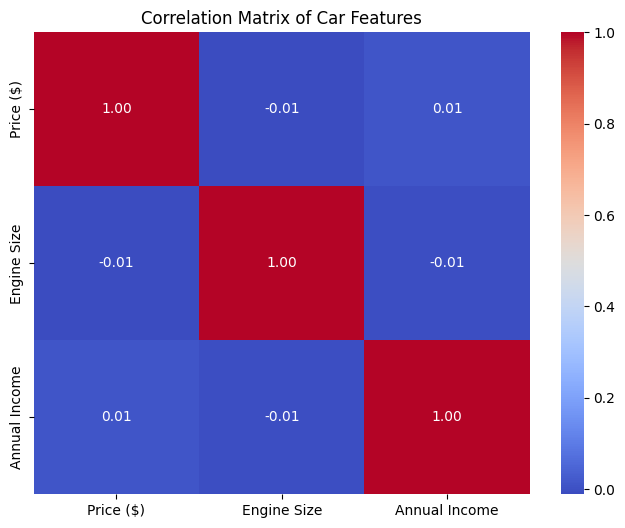

In [336]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

engine_encoding={
    'Double Overhead Camshaft':1,
    'Overhead Camshaft':2
}
dataset_2['Engine Size']=dataset_2['Engine'].map(engine_encoding)
correlation_matrix_cars=dataset_2[['Price ($)','Engine Size','Annual Income']].corr()
print("Correlation matrix between car price, engine size, and annual income:")
print(correlation_matrix_cars)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix_cars,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix of Car Features')
plt.show()

Average car price by model and engine type:
        Model                    Engine     Price ($)
0       3-Sep  Double Overhead Camshaft  37986.380117
1      3000GT  Double Overhead Camshaft  22764.326923
2      3000GT         Overhead Camshaft  21770.659864
3        300M  Double Overhead Camshaft  21394.888889
4        323i  Double Overhead Camshaft  16744.632287
..        ...                       ...           ...
256  Windstar         Overhead Camshaft  17100.272727
257  Wrangler  Double Overhead Camshaft  21145.294737
258  Wrangler         Overhead Camshaft  18742.942029
259    Xterra  Double Overhead Camshaft  15940.459459
260    Xterra         Overhead Camshaft  31072.500000

[261 rows x 3 columns]


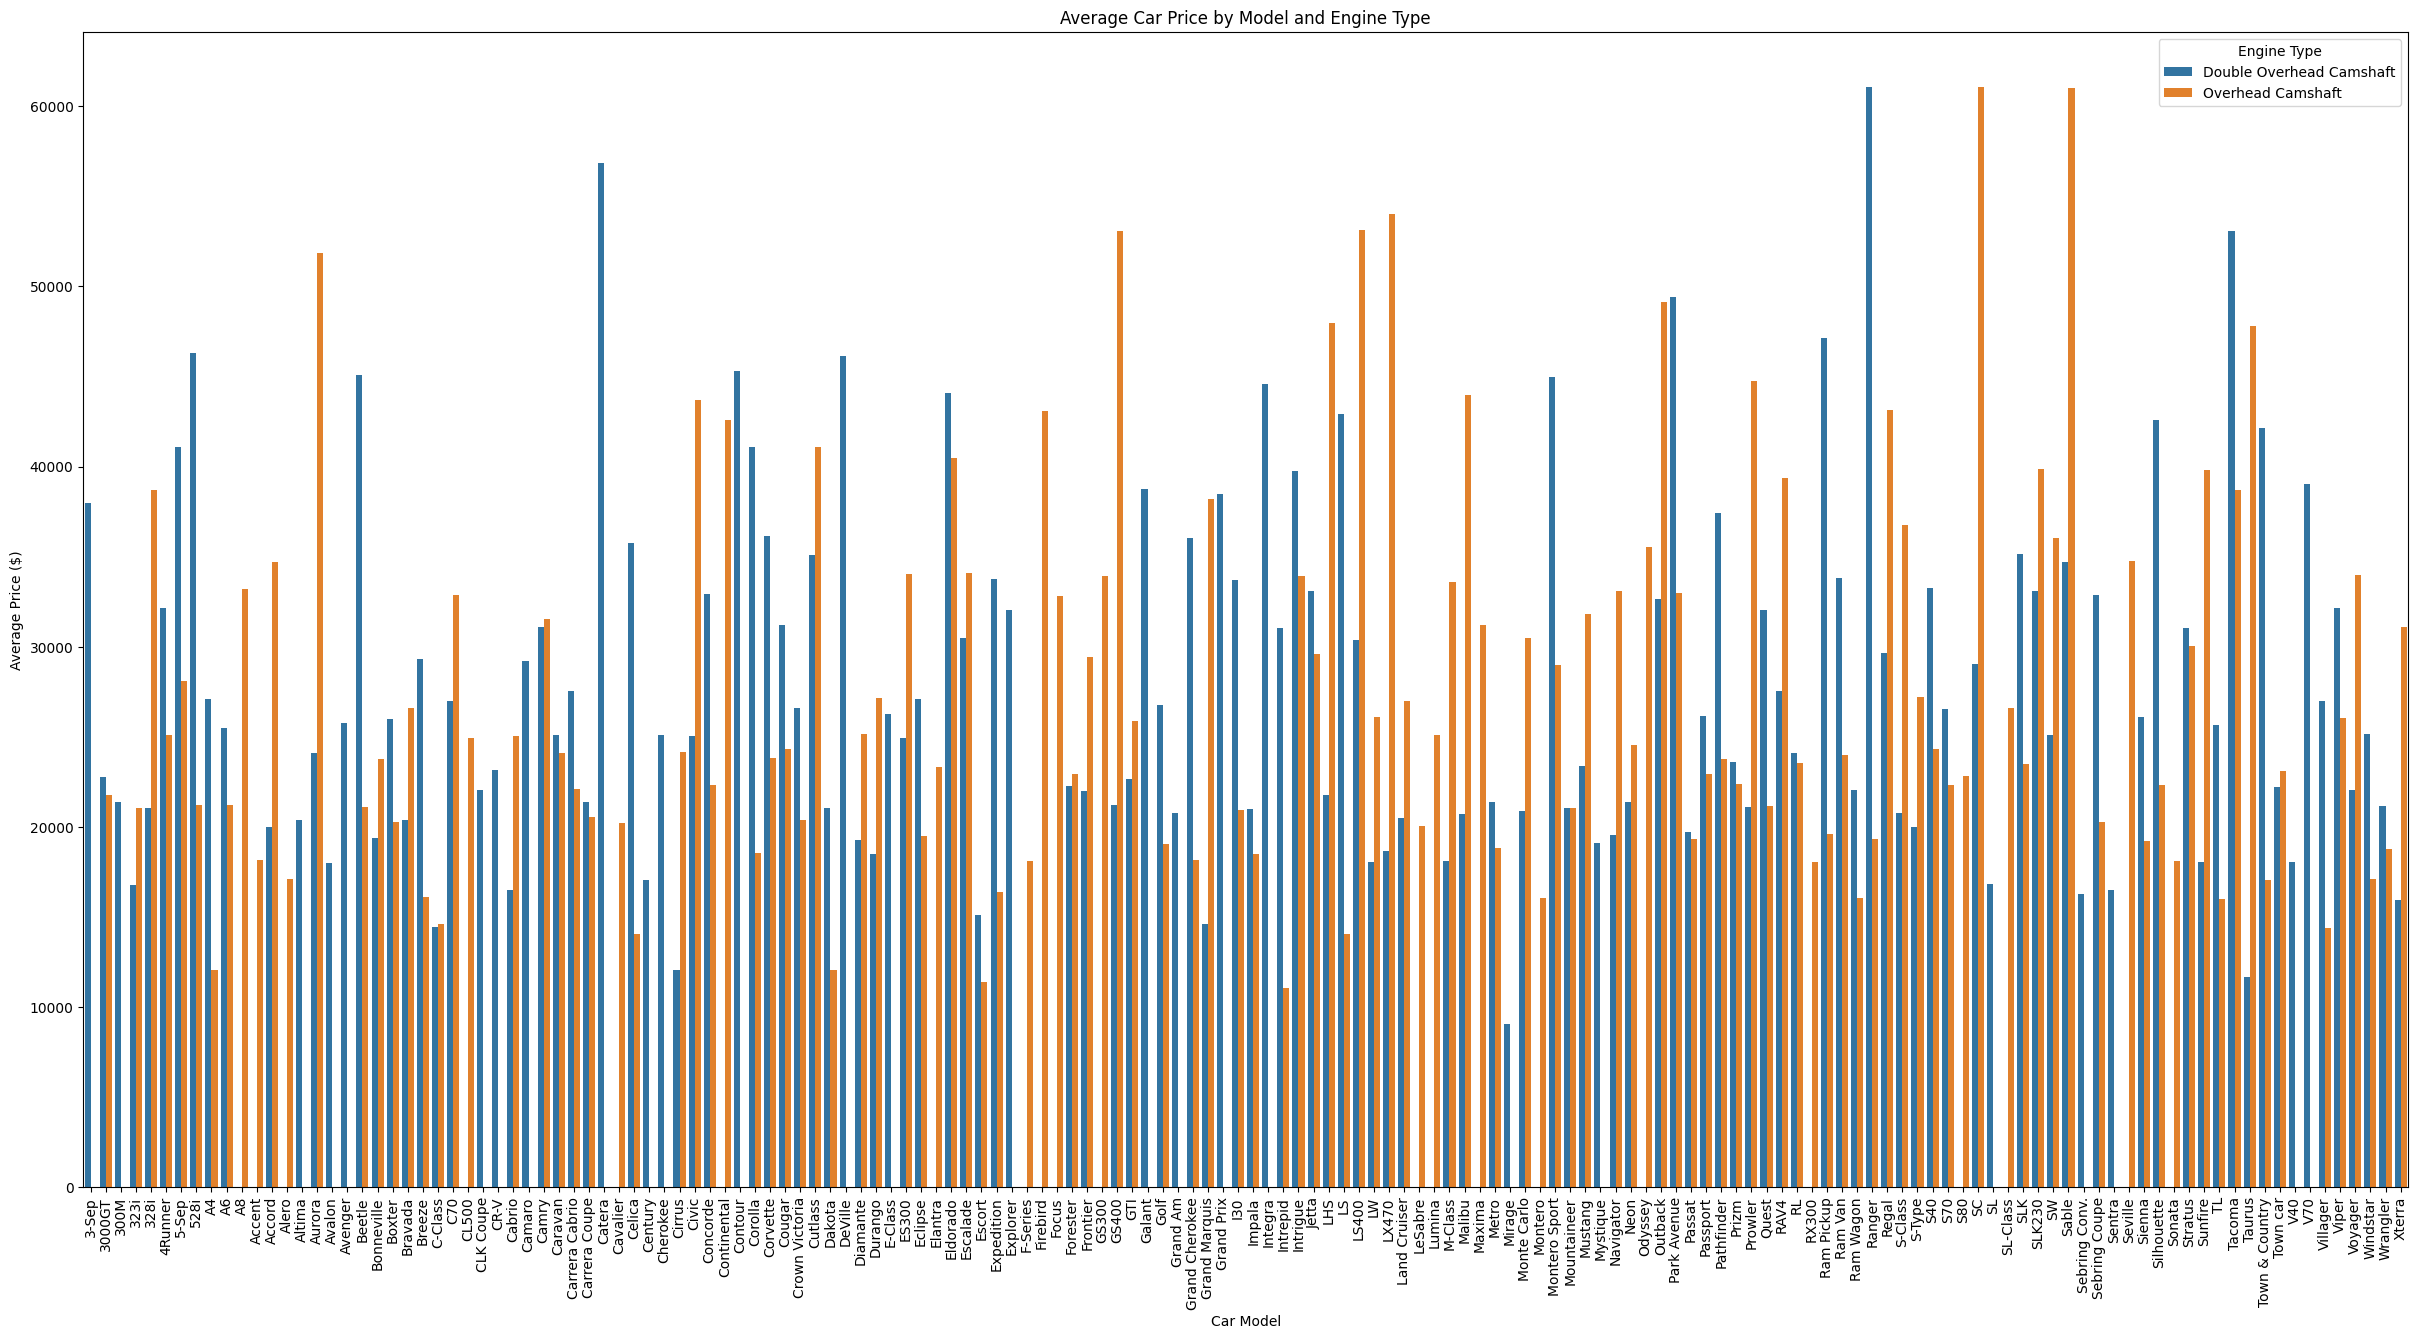

In [334]:
# 15. How does the average car price vary across different car models and engine types?

average_price_by_model_engine=dataset_2.groupby(['Model','Engine'])['Price ($)'].mean().reset_index()
print("Average car price by model and engine type:")
print(average_price_by_model_engine)
plt.figure(figsize=(30,15))
sns.barplot(x='Model',y='Price ($)',hue='Engine',data=average_price_by_model_engine)
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Car Model')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=90)
plt.legend(title='Engine Type')
plt.show()

EDA - 3

In [374]:
dataset_3=pd.read_csv('amazon.csv')
dataset_3['discounted_price']=dataset_3['discounted_price'].str.replace('₹','').str.replace(',','').astype(float)
dataset_3['actual_price']=dataset_3['actual_price'].str.replace('₹','').str.replace(',','').astype(float)
dataset_3['discount_percentage']=dataset_3['discount_percentage'].str.replace('%','').astype(float)
dataset_3['rating']=dataset_3['rating'].str.replace('|','0').astype(float)
dataset_3['rating_count']=dataset_3['rating_count'].str.replace(',','').astype(float)
dataset_3

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379.0,919.0,59.0,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280.0,3045.0,25.0,4.1,4118.0,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but th

In [375]:
# 1. What is the average rating for each product category?

average_rating_by_category=dataset_3.groupby('category')['rating'].mean().sort_values(ascending=False)
print("Average rating for each product category:")
print(average_rating_by_category)

Average rating for each product category:
category
Computers&Accessories|Tablets                                                                                    4.60
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.50
Electronics|Cameras&Photography|Accessories|Film                                                                 4.50
Computers&Accessories|Components|Memory                                                                          4.50
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.50
                                                                                                                 ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                  3.50
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.50
Home&

In [387]:
# 2. What are the top rating_count products by category?

index=dataset_3.groupby('category')['rating_count'].idxmax()
top_rating_count_products_by_category=dataset_3.loc[index].sort_values(by='rating_count',ascending=False)
print("Top rating_count products by category:")
print(top_rating_count_products_by_category[['category','product_name','rating_count']])

Top rating_count products by category:
                                               category  \
12    Electronics|HomeTheater,TV&Video|Accessories|C...   
352   Electronics|Headphones,Earbuds&Accessories|Hea...   
370   Electronics|Mobiles&Accessories|Smartphones&Ba...   
1028  Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...   
588   Computers&Accessories|ExternalDevices&DataStor...   
...                                                 ...   
863   Computers&Accessories|Components|InternalHardD...   
1014   Computers&Accessories|Laptops|TraditionalLaptops   
557   Electronics|Mobiles&Accessories|MobileAccessor...   
269        Electronics|HomeAudio|Speakers|TowerSpeakers   
264   Electronics|HomeAudio|MediaStreamingDevices|St...   

                                           product_name  rating_count  
12    AmazonBasics Flexible Premium HDMI Cable (Blac...      426973.0  
352   boAt Bassheads 100 in Ear Wired Earphones with...      363713.0  
370   Redmi 9 Activ (Carbon Black, 4

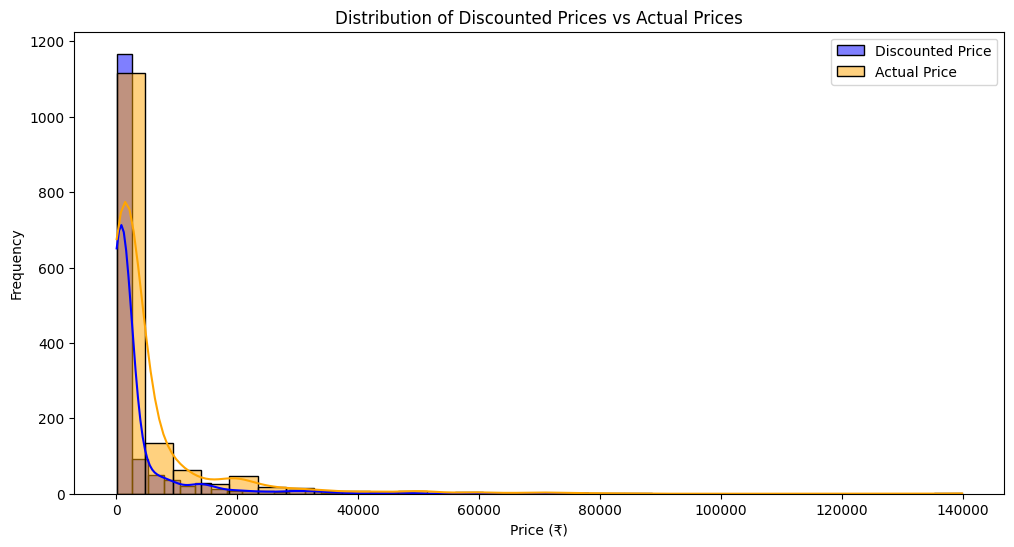

In [ ]:
# 3. What is the distribution of discounted prices vs. actual prices?

plt.figure(figsize=(12,6))
sns.histplot(data=dataset_3,x='discounted_price',bins=30,kde=True,color='blue',label='Discounted Price')
sns.histplot(data=dataset_3,x='actual_price',bins=30,kde=True,color='orange',label='Actual Price')
plt.title('Distribution of Discounted Prices vs Actual Prices')
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Average discount percentage by category:
category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                            90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                    90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                   90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                   88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers         87.5
                                                                                                                      ... 
OfficeProducts|OfficeElectronics|Calculators|Financial&Business                                                        0.0
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper                

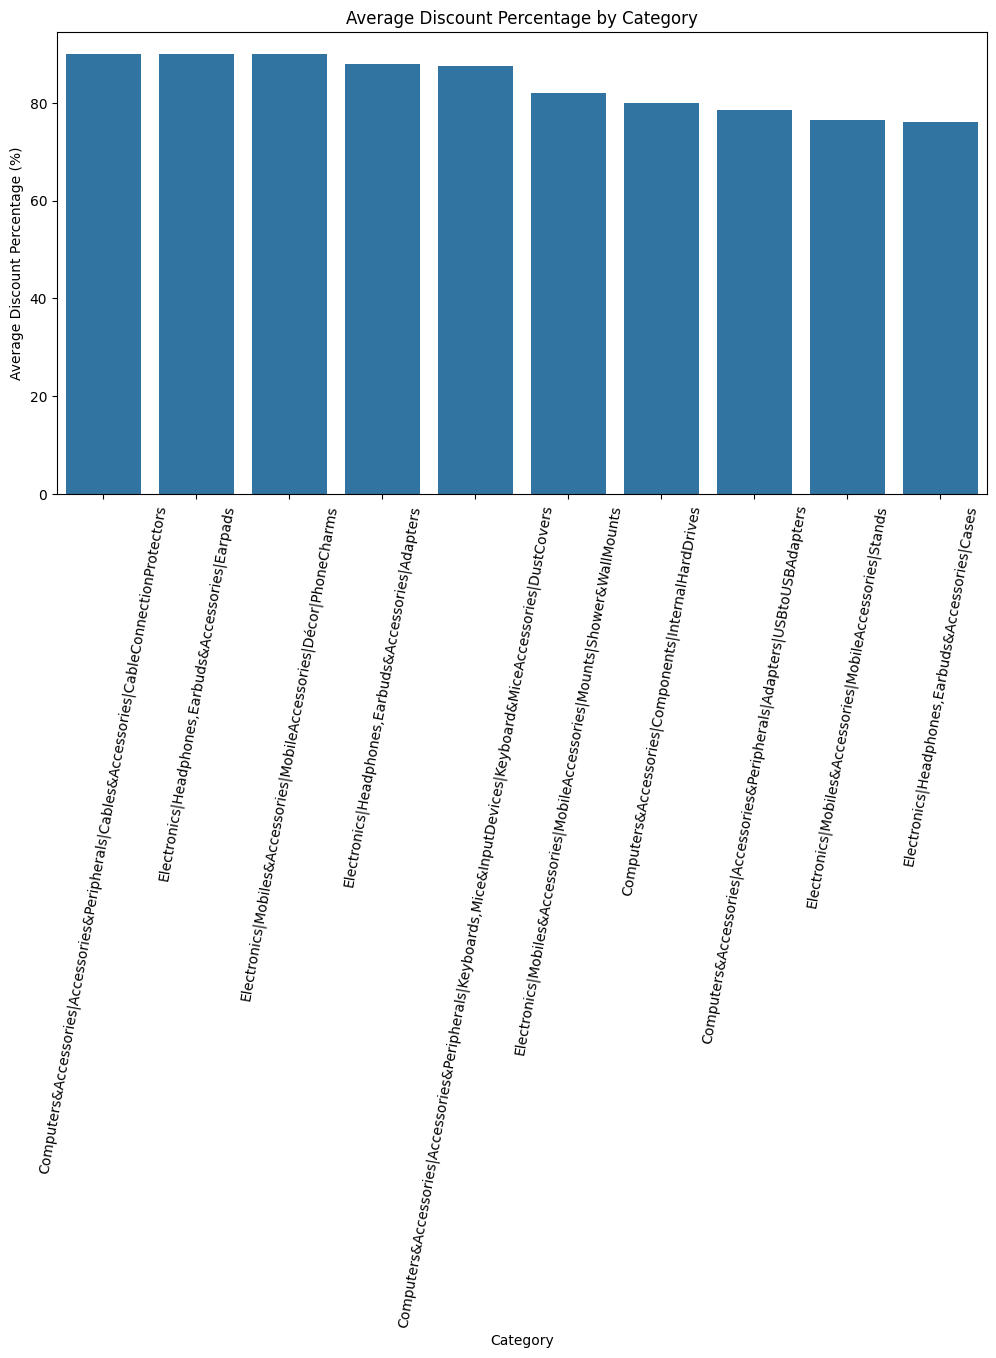

In [397]:
# 4. How does the average discount percentage vary across categories?

average_discount_by_category=dataset_3.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
print("Average discount percentage by category:")
print(average_discount_by_category)
plt.figure(figsize=(12,6))
sns.barplot(x=average_discount_by_category.head(10).index,y=average_discount_by_category.head(10).values)
plt.title('Average Discount Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage (%)')
plt.xticks(rotation=80)
plt.show()

Most popular product names:
product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                                            3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                 3
Flix Micro Usb Cable For Smartphone (Black)                                                                                                

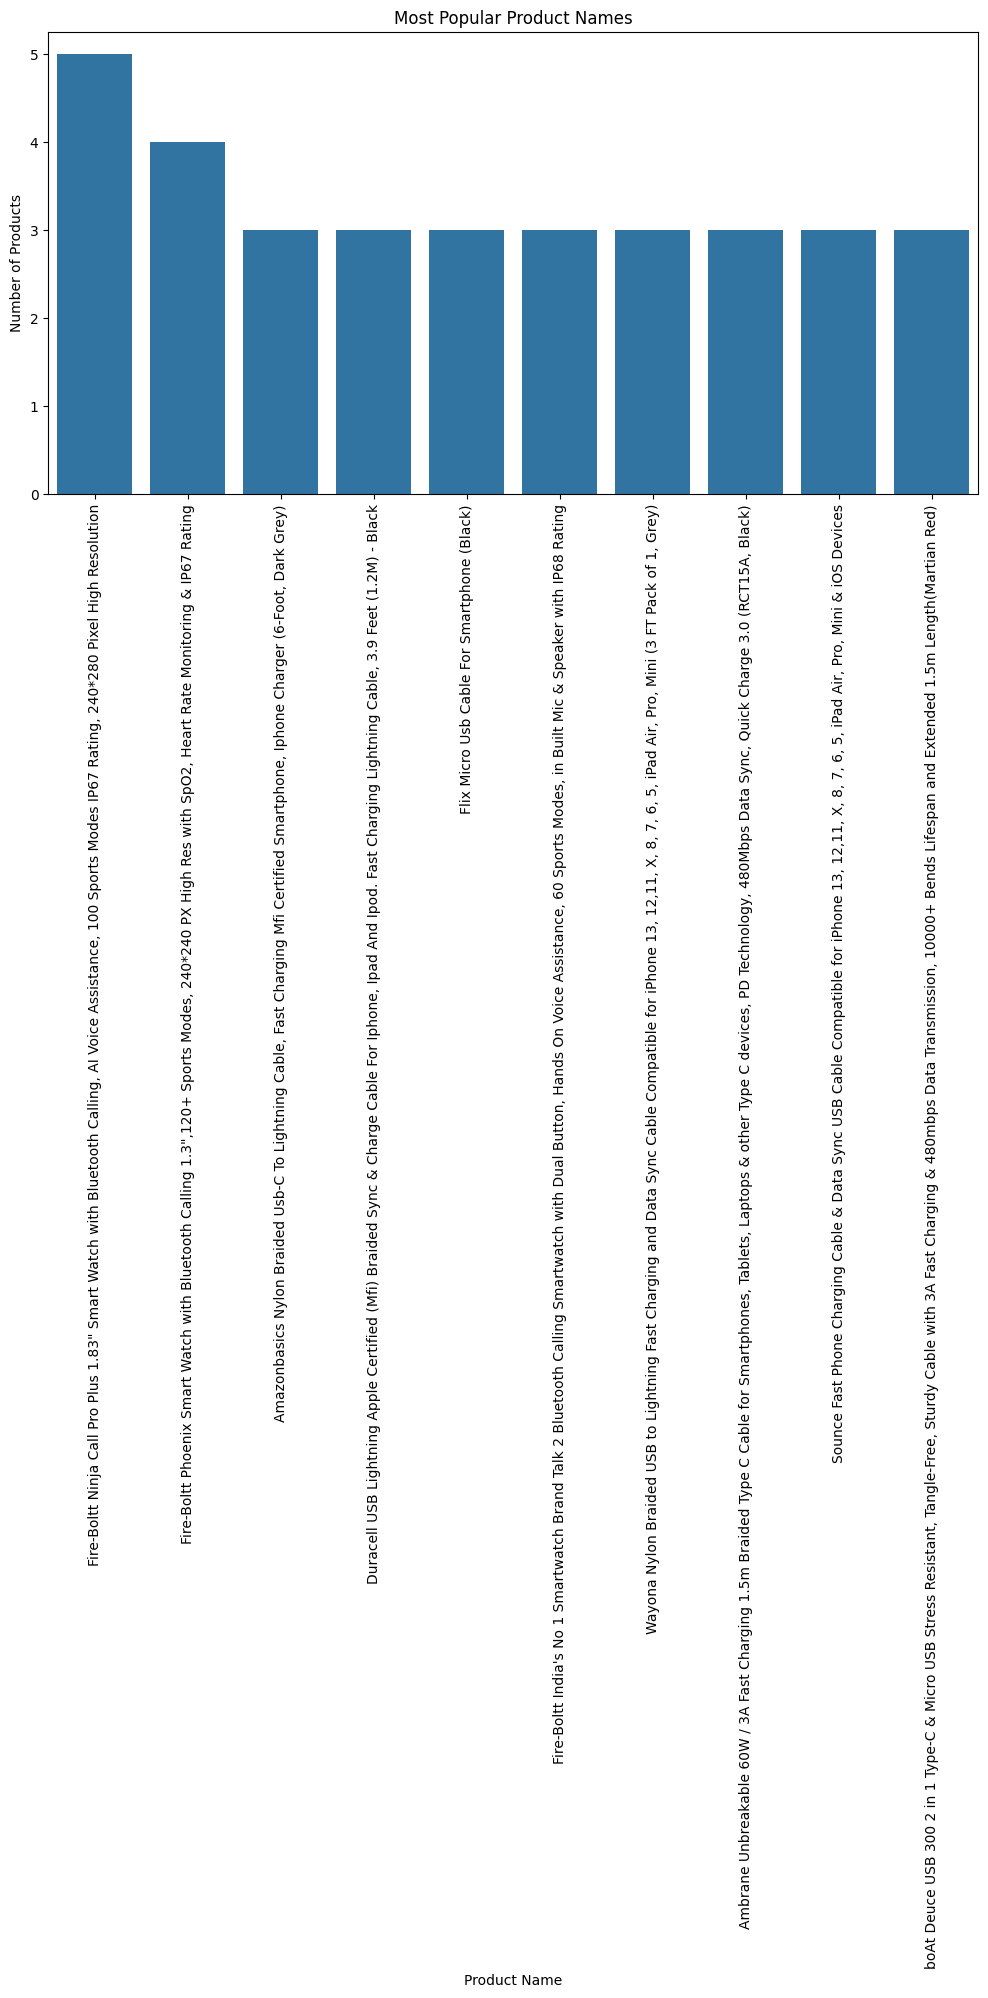

In [403]:
# 5. What are the most popular product names?

most_popular_products=dataset_3['product_name'].value_counts().head(10)
print("Most popular product names:")
print(most_popular_products)
plt.figure(figsize=(12,6))
sns.barplot(x=most_popular_products.index,y=most_popular_products.values)
plt.title('Most Popular Product Names')
plt.xlabel('Product Name')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.show()

In [408]:
# 6. What are the most popular product keywords?

words=dataset_3['product_name'].str.lower().str.findall(r'\b[a-z]{2,}\b')
most_popular_keywords=words.explode().value_counts().head(10)
print("Most popular product keywords:")
print(most_popular_keywords)

Most popular product keywords:
product_name
with        752
for         674
black       530
usb         417
cable       414
and         331
charging    247
type        243
to          219
fast        212
Name: count, dtype: int64


In [411]:
# 7. What are the most popular product reviews?

most_popular_reviews=dataset_3['review_title'].value_counts().head(10)
print("Most popular product reviews:")
print(most_popular_reviews)

Most popular product reviews:
review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                  8
A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super 

Correlation between discounted price and rating:
                  discounted_price    rating
discounted_price          1.000000  0.114298
rating                    0.114298  1.000000


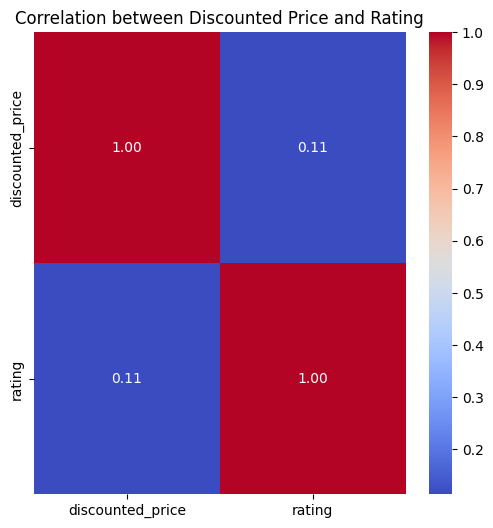

In [412]:
# 8. What is the correlation between discounted_price and rating?

correlation_discounted_price_rating=dataset_3[['discounted_price','rating']].corr()
print("Correlation between discounted price and rating:")
print(correlation_discounted_price_rating)
plt.figure(figsize=(6,6))
sns.heatmap(correlation_discounted_price_rating,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation between Discounted Price and Rating')
plt.show()

In [414]:
# 9. What are the Top 5 categories based on the highest ratings?

highest_rating_by_category=dataset_3.groupby('category')['rating'].idxmax()
top_5_categories_by_rating=dataset_3.loc[highest_rating_by_category].sort_values(by='rating',ascending=False).head(5)
print("Top 5 categories based on the highest ratings:")
print(top_5_categories_by_rating[['category','rating']])

Top 5 categories based on the highest ratings:
                                               category  rating
174   Computers&Accessories|Accessories&Peripherals|...     5.0
775   Computers&Accessories|Accessories&Peripherals|...     5.0
1145  Home&Kitchen|Heating,Cooling&AirQuality|WaterH...     4.8
1201  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...     4.8
1299  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...     4.8


In [ ]:
# 10. Identify any potential areas for improvement or optimization based on the data analysis.



EDA - 4

In [425]:
dataset_4=pd.read_csv('spotify.csv')
dataset_4

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [423]:
# 1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

if dataset_4.isnull().values.any():
    print("Null values found in the dataset. Filling null values with 0.")
    dataset_4.fillna(0,inplace=True)
if dataset_4.duplicated().any():
    print("Duplicate rows found in the dataset. Removing duplicate rows.")
    dataset_4.drop_duplicates(inplace=True)

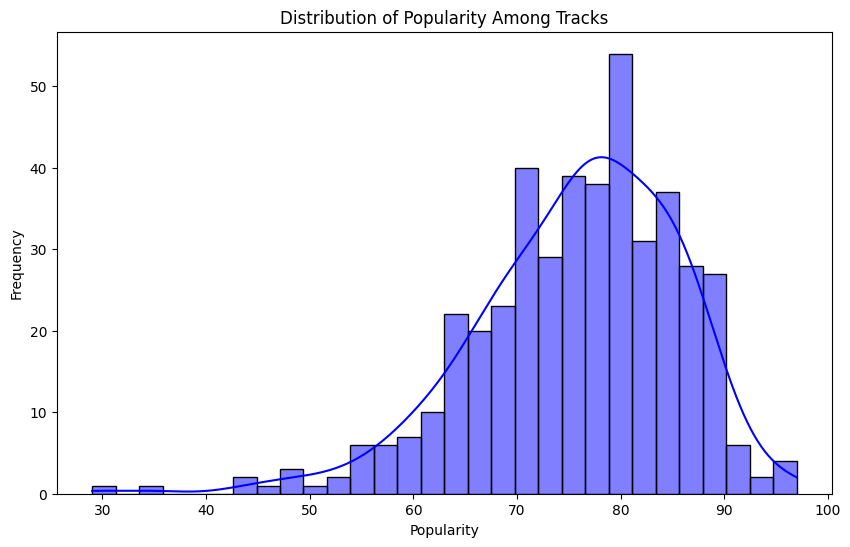

In [428]:
# 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

plt.figure(figsize=(10,6))
sns.histplot(dataset_4['Popularity'],bins=30,kde=True,color='blue')
plt.title('Distribution of Popularity Among Tracks')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

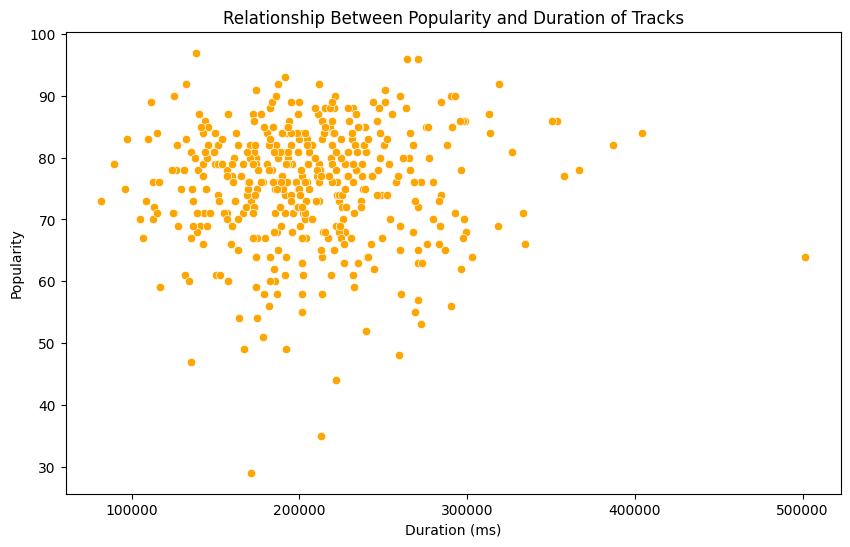

In [431]:
# 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

plt.figure(figsize=(10,6))
sns.scatterplot(x='Duration (ms)',y='Popularity',data=dataset_4,color='orange')
plt.title('Relationship Between Popularity and Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

Artist with the highest number of tracks:
Artist
Drake    20
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

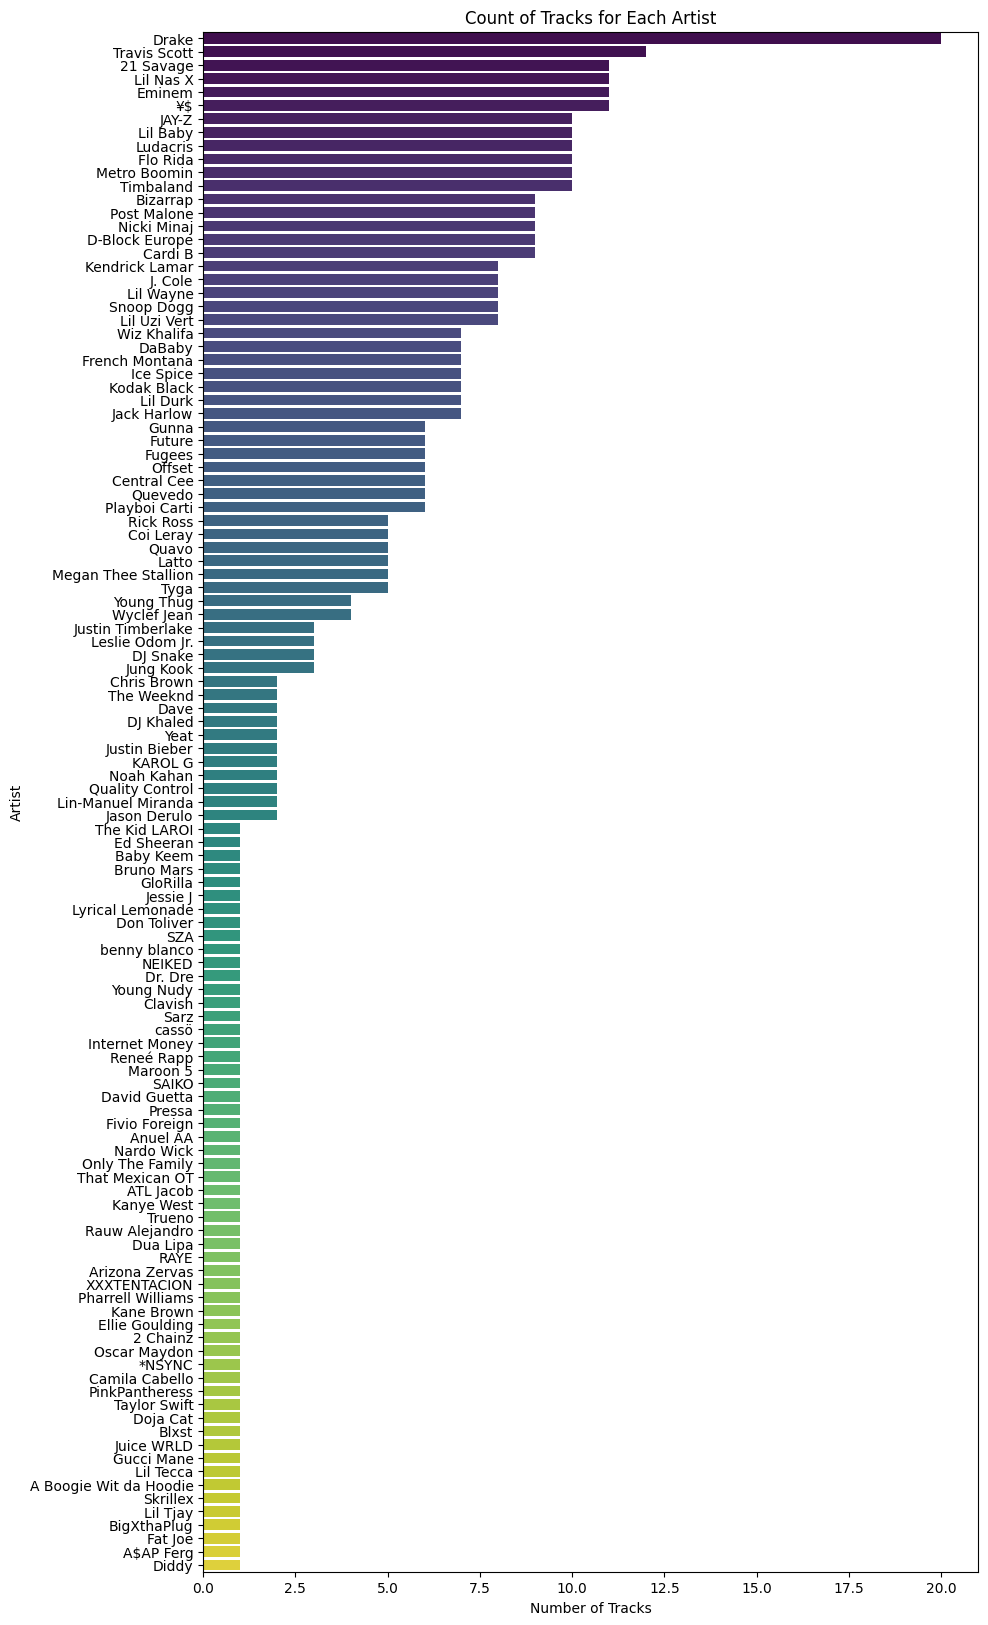

In [446]:
# 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?

plt.figure(figsize=(12,6))
artist_track_count=dataset_4['Artist'].value_counts()
print("Artist with the highest number of tracks:")
print(artist_track_count.head(1))
plt.figure(figsize=(10,20))
sns.countplot(y='Artist',data=dataset_4,order=artist_track_count.index,palette='viridis')
plt.title('Count of Tracks for Each Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')    
plt.show()

In [448]:
# 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

least_popular_tracks=dataset_4.sort_values(by='Popularity')[['Artist','Track Name','Popularity']].head(5)
print("Top 5 least popular tracks in the dataset:")
print(least_popular_tracks)

Top 5 least popular tracks in the dataset:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
435  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


In [449]:
# 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

top_5_artists=dataset_4['Artist'].value_counts().head(5).index
average_popularity_top_5_artists=dataset_4[dataset_4['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print("Average popularity for each of the top 5 most popular artists:")
print(average_popularity_top_5_artists)

Average popularity for each of the top 5 most popular artists:
Artist
Travis Scott    87.000000
21 Savage       84.181818
Eminem          83.636364
Drake           83.500000
Lil Nas X       76.090909
Name: Popularity, dtype: float64


In [464]:
# 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

most_popular_tracks_top_5_artists=dataset_4[dataset_4['Artist'].isin(top_5_artists)].sort_values(by='Popularity',ascending=False).groupby('Artist').head(1).reset_index()
print("Most popular tracks for each of the top 5 most popular artists:")
print(most_popular_tracks_top_5_artists[['Artist','Track Name','Popularity']])

Most popular tracks for each of the top 5 most popular artists:
         Artist                               Track Name  Popularity
0     21 Savage                                   redrum          96
1  Travis Scott               FE!N (feat. Playboi Carti)          93
2         Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92
3        Eminem                               Without Me          90
4     Lil Nas X                        THATS WHAT I WANT          81


<Figure size 1000x800 with 0 Axes>

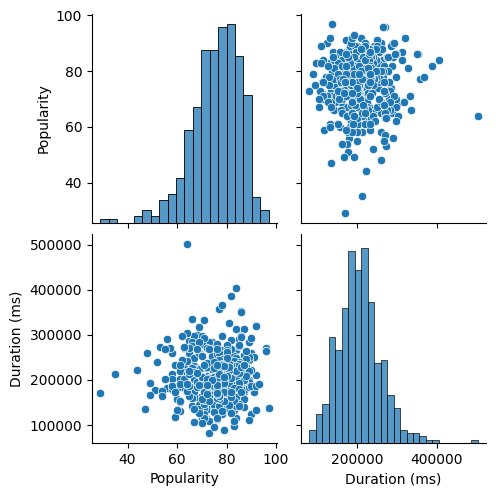

In [ ]:
# 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

numerical_columns=dataset_4.select_dtypes(include=['int64','float64'])
sns.pairplot(dataset_4,hue='')
plt.show()